In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
trainset=pd.read_csv('../input/digit-recognizer/train.csv')
testset=pd.read_csv('../input/digit-recognizer/test.csv')
y=trainset['label'].values
x=trainset.drop(['label'], axis=1).values
testset=testset.values
#x_train=x_train.values

function to reshape datasets for fitting in CNN model

In [3]:
def reshape(dataset):
    temp=[]
    for i in range(len(dataset)):
        temp.append(dataset[i].reshape(28,28))
    newset=np.array(temp)
    return newset

testing our model on validation sets created out from trainset itself

In [4]:
x_train28=reshape(x)
x_train28=x_train28/255.#use this for final results
x_train28 = np.expand_dims(x_train28, -1)
x_train, x_test, y_train, y_test = train_test_split(x_train28, y, random_state=0, test_size=0.2)

In [5]:
cnn=Sequential()
cnn.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(10, activation='softmax'))

In [23]:
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, 32)
steps_per_epoch = x_train.shape[0] // 32
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn = cnn.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=16)

Epoch 1/16
1050/1050 [==============================] - 12s 11ms/step - loss: 0.6595 - accuracy: 0.7777 - val_loss: 0.1911 - val_accuracy: 0.9426
Epoch 2/16
1050/1050 [==============================] - 10s 10ms/step - loss: 0.2952 - accuracy: 0.9044 - val_loss: 0.1255 - val_accuracy: 0.9617
Epoch 3/16
1050/1050 [==============================] - 10s 10ms/step - loss: 0.2222 - accuracy: 0.9295 - val_loss: 0.0816 - val_accuracy: 0.9751
Epoch 4/16
1050/1050 [==============================] - 11s 10ms/step - loss: 0.1860 - accuracy: 0.9419 - val_loss: 0.0801 - val_accuracy: 0.9752
Epoch 5/16
1050/1050 [==============================] - 10s 9ms/step - loss: 0.1651 - accuracy: 0.9481 - val_loss: 0.0785 - val_accuracy: 0.9732
Epoch 6/16
1050/1050 [==============================] - 10s 9ms/step - loss: 0.1451 - accuracy: 0.9541 - val_loss: 0.0768 - val_accuracy: 0.9758
Epoch 7/16
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1356 - accuracy: 0.9560 - val_loss: 0.0651 - v

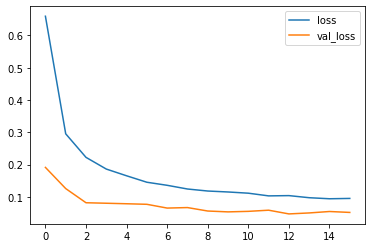

In [24]:
plt.plot(model_cnn.history['loss'], label='loss')
plt.plot(model_cnn.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
results_temp=cnn.predict(x_test)
pred_digits = np.argmax(results_temp, axis=1)
results_temp=list(pred_digits)

Fitting the tested model on actual test set(make sure we don't have the actual labels)

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train28, y, epochs=20)

In [6]:
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train28, y, 32)
steps_per_epoch = x_train28.shape[0] // 32
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=45)

Epoch 1/45
1312/1312 [==============================] - 11s 9ms/step - loss: 0.6358 - accuracy: 0.7878
Epoch 2/45
1312/1312 [==============================] - 11s 9ms/step - loss: 0.2710 - accuracy: 0.9139
Epoch 3/45
1312/1312 [==============================] - 12s 9ms/step - loss: 0.2025 - accuracy: 0.9377
Epoch 4/45
1312/1312 [==============================] - 12s 9ms/step - loss: 0.1673 - accuracy: 0.9469
Epoch 5/45
1312/1312 [==============================] - 12s 9ms/step - loss: 0.1500 - accuracy: 0.9533
Epoch 6/45
1312/1312 [==============================] - 12s 9ms/step - loss: 0.1350 - accuracy: 0.9574
Epoch 7/45
1312/1312 [==============================] - 12s 9ms/step - loss: 0.1239 - accuracy: 0.9617
Epoch 8/45
1312/1312 [==============================] - 12s 9ms/step - loss: 0.1199 - accuracy: 0.9618
Epoch 9/45
1312/1312 [==============================] - 14s 10ms/step - loss: 0.1131 - accuracy: 0.9651
Epoch 10/45
1312/1312 [==============================] - 12s 9ms/step - 

testing on the testset

In [7]:
test=reshape(testset)
test=test/255.#use this for final results
test= np.expand_dims(test, -1)

results=cnn.predict(test)
pred_digits = np.argmax(results, axis=1)
results=list(pred_digits)

In [8]:
output = pd.DataFrame({'ImageId': np.arange(1,len(results)+1), 'Label': results})
output.to_csv('./MNIST_submission.csv', index=False)

**the above model will get an accuracy near about 98.857%, it can be checked out in kaggle leaderboards**